#EDA

#Project Name -  Bike Details Dataset
##Project Type - EDA


#Project Summary -

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

#Let's Begin !

#1. Know Your Data

Import Libraries :

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Dataset Loading :

In [5]:
url = 'https://drive.google.com/file/d/1nr6Mphh7FN6V6OaR6-IH71__qSjBREg_/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

Dataset First View


In [6]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Dataset Rows & Columns count

In [7]:
df.shape

(1061, 7)

Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


Duplicate Values

In [9]:
len(df[df.duplicated()])


6

Missing Values/Null Values

In [10]:
df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


#Questions:

1.  What is the range of selling prices in the dataset?

In [11]:
df['selling_price'].max() - df['selling_price'].min()

755000

2. What is the median selling price for bikes in the dataset?

In [12]:
df['selling_price'].median()

45000.0

3. What is the most common seller type?

In [13]:
df['seller_type'].mode()[0]

'Individual'

4. How many bikes have driven more than 50,000 kilometers?

In [14]:
(df['km_driven'] > 50000).sum()

np.int64(170)

5. What is the average km_driven value for each ownership type?

In [15]:
df.groupby('owner')['km_driven'].mean()


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6. What proportion of bikes are from the year 2015 or older?

In [16]:
(df['year'] <= 2015).mean()


np.float64(0.5664467483506126)

7. What is the trend of missing values across the dataset?

In [17]:
df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


8. What is the highest ex_showroom_price recorded, and for which bikeD


In [18]:
df.loc[df['ex_showroom_price'].idxmax()][['name', 'ex_showroom_price']]


,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


9.  What is the total number of bikes listed by each seller type?

In [19]:
df['seller_type'].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [20]:
df['owner'] = df['owner'].str.strip().str.title()


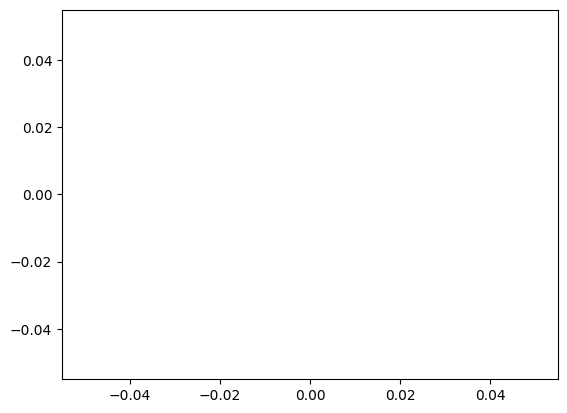

In [21]:
sns.scatterplot(data=df[df['owner'] == 'First Owner'], x='km_driven', y='selling_price')
plt.show()

11. Identify and remove outliers in the km_driven column using the IQR method.

In [22]:
Q1, Q3 = df['km_driven'].quantile([0.25, 0.75]); IQR = Q3 - Q1; df = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]


12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

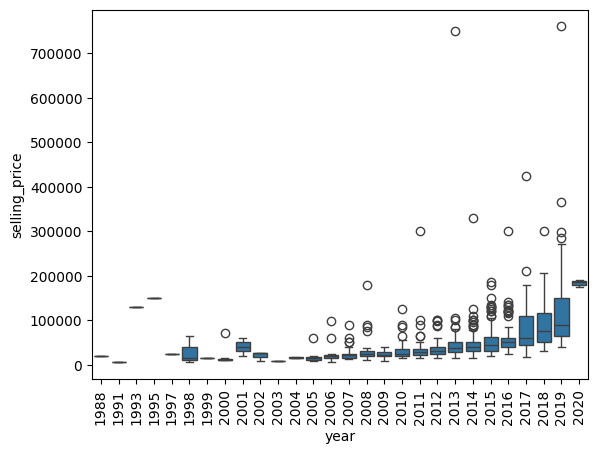

In [23]:
sns.boxplot(data=df, x='year', y='selling_price'); plt.xticks(rotation=90); plt.show()


13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [24]:
df['age'] = 2025 - df['year']; df.groupby('age')['selling_price'].mean()


,selling_price
age,
5,183333.333333
6,119689.511628
7,87660.374046
8,78962.121212
9,57924.126214
10,56313.131313
11,49121.348315
12,51802.816901
13,36157.560606


14. Which bike names are priced significantly above the average price for their manufacturing year?

In [25]:
df[df['selling_price'] > df.groupby('year')['selling_price'].transform('mean') + 2 * df.groupby('year')['selling_price'].transform('std')][['name', 'year', 'selling_price']]

,name,year,selling_price
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
52,Royal Enfield Electra 5 S,2010,90000
134,Harley-Davidson Street Bob,2013,750000
137,KTM 390 Duke ABS [2013-2016],2015,130000
161,Royal Enfield Classic Desert Storm,2012,100000
208,Royal Enfield Bullet 500,2015,130000
224,Royal Enfield Bullet 350 [2007-2011],2007,90000
242,KTM RC 390,2017,210000
286,Royal Enfield Classic Desert Storm,2015,130000


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

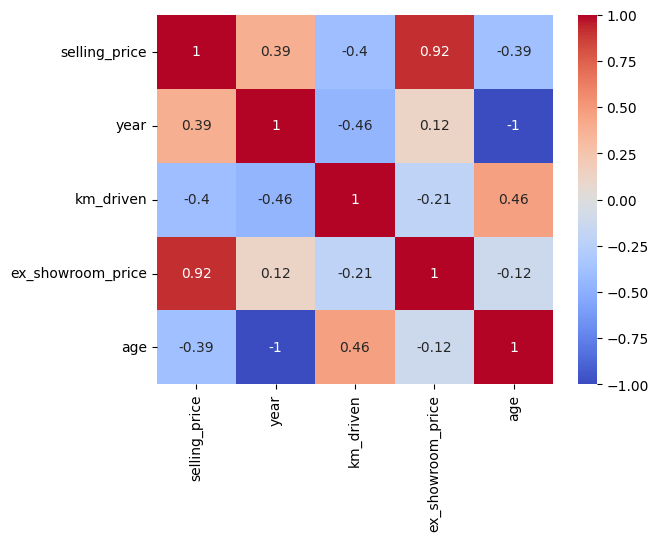

In [26]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm'); plt.show()


#Project Name - Car Sale Dataset
#Project Type - EDA


Project Summary -

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

#Let's Begin !

Dataset Loading :

In [27]:
url = 'https://drive.google.com/file/d/1OiGatSZZzE2rvfOV27iUNNhyXQ_rbO-C/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
cs = pd.read_csv(url)

Dataset First View

In [28]:
cs.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Dataset Rows & Columns count

In [29]:
cs.shape

(23906, 16)

Dataset Information

In [30]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Duplicate Values

In [31]:
len(cs[cs.duplicated()])

0

Missing Values/Null Values

In [32]:
cs.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


#Questions :

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?


In [33]:
cs.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)


,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [34]:
cs.groupby('Company')['Price ($)'].std().sort_values(ascending=False)


,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

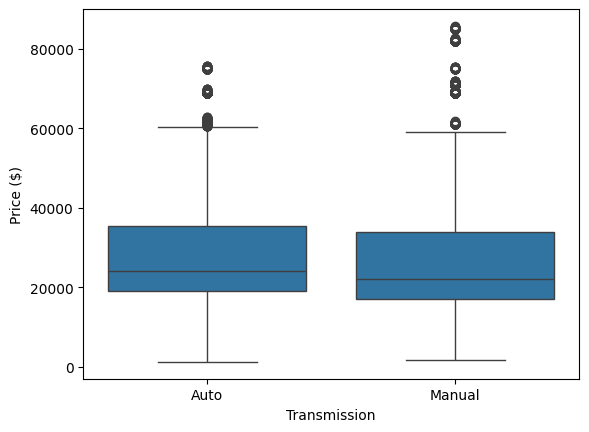

In [35]:
sns.boxplot(data=cs, x='Transmission', y='Price ($)'); plt.show()


4. What is the distribution of car prices across different regions?

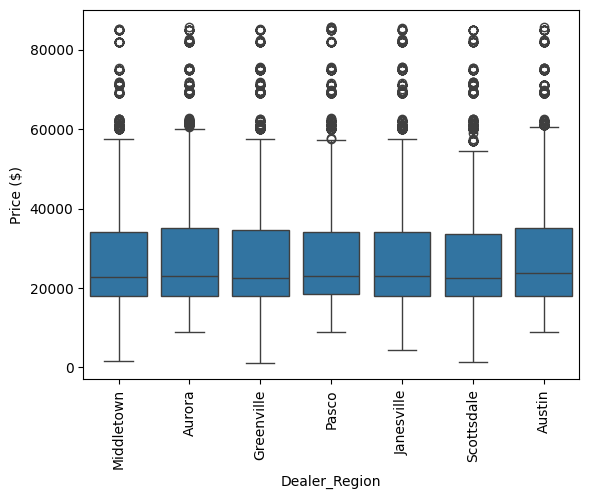

In [36]:
sns.boxplot(data=cs, x='Dealer_Region', y='Price ($)'); plt.xticks(rotation=90); plt.show()


5. What is the distribution of cars based on body styles?


In [37]:
cs['Body Style'].value_counts()


,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


6. How does the average selling price of cars vary by customer gender and annual income?

In [38]:
cs.groupby(['Gender'])[['Annual Income', 'Price ($)']].mean()


,Annual Income,Price ($)
Gender,,
Female,755973.021339,28277.265270
Male,851184.044207,28039.429407


7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [39]:
cs.groupby('Dealer_Region')['Price ($)'].describe(), cs['Dealer_Region'].value_counts()


(                count          mean           std     min      25%      50%  \
 Dealer_Region                                                                 
 Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
 Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
 Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
 Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
 Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
 Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
 Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   
 
                    75%      max  
 Dealer_Region                    
 Aurora         35000.0  85800.0  
 Austin         35001.0  85601.0  
 Greenville     34500.0  85200.0  
 Janesville     34000.0  85400.0  
 Middletown     34000.0  85300.0  
 Pasco          34000.0  85600.0 

8. How does the average car price differ between cars with different engine size?

In [40]:
cs.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)


,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


9. How do car prices vary based on the customer’s annual income bracket?

In [41]:
pd.cut(cs['Annual Income'], bins=5).value_counts().sort_index(), cs.groupby(pd.cut(cs['Annual Income'], bins=5))['Price ($)'].mean()


<ipython-input-41-e07e0c178239>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.cut(cs['Annual Income'], bins=5).value_counts().sort_index(), cs.groupby(pd.cut(cs['Annual Income'], bins=5))['Price ($)'].mean()


(Annual Income
 (-1109.92, 2248064.0]      22917
 (2248064.0, 4486048.0]       926
 (4486048.0, 6724032.0]        59
 (6724032.0, 8962016.0]         3
 (8962016.0, 11200000.0]        1
 Name: count, dtype: int64,
 Annual Income
 (-1109.92, 2248064.0]      28044.351311
 (2248064.0, 4486048.0]     29211.227862
 (4486048.0, 6724032.0]     27736.745763
 (6724032.0, 8962016.0]     40333.333333
 (8962016.0, 11200000.0]    26001.000000
 Name: Price ($), dtype: float64)

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

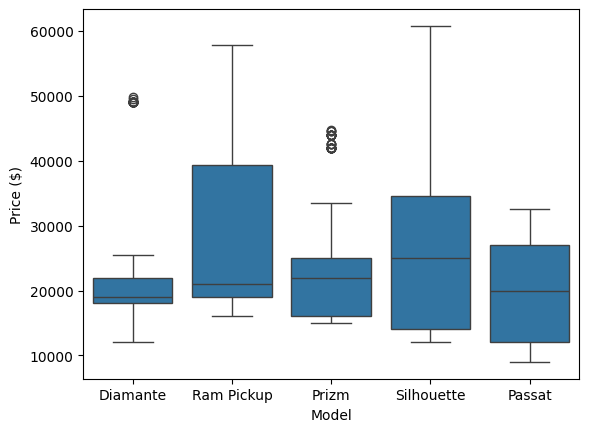

In [42]:
top_models = cs['Model'].value_counts().head(5).index
sns.boxplot(data=cs[cs['Model'].isin(top_models)], x='Model', y='Price ($)'); plt.show()


11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

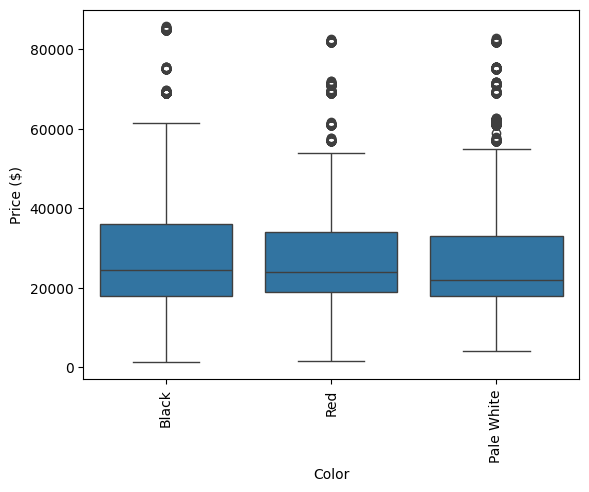

In [43]:
sns.boxplot(data=cs, x='Color', y='Price ($)'); plt.xticks(rotation=90); plt.show()


12. Is there any seasonal trend in car sales based on the date of sale?

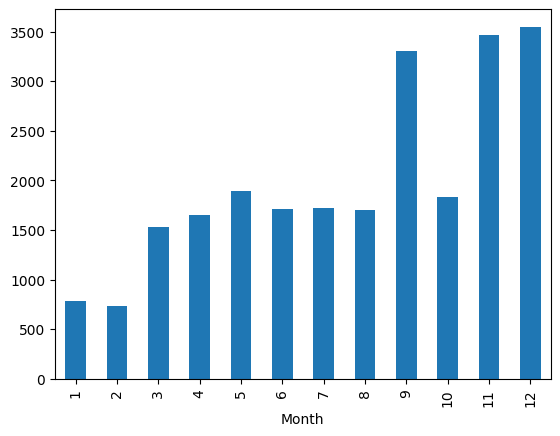

In [44]:
cs['Date'] = pd.to_datetime(cs['Date']); cs['Month'] = cs['Date'].dt.month; cs['Month'].value_counts().sort_index().plot(kind='bar'); plt.show()


13.  How does the car price distribution change when considering different combinations of body style and transmission type?

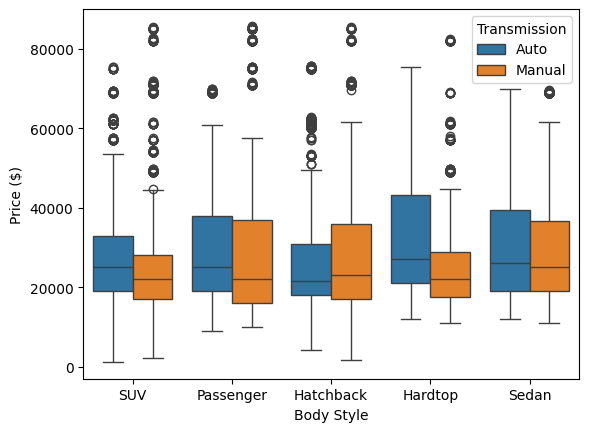

In [45]:
sns.boxplot(data=cs, x='Body Style', y='Price ($)', hue='Transmission'); plt.show()


14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

In [46]:
# Extract engine size number (approximate logic)
cs['Engine_Size'] = cs['Engine'].str.extract(r'(\d+\.?\d*)').astype(float)
cs[['Price ($)', 'Engine_Size', 'Annual Income']].corr()


,Price ($),Engine_Size,Annual Income
Price ($),1.000000,NaN,0.012065
Engine_Size,NaN,NaN,NaN
Annual Income,0.012065,NaN,1.000000


15. How does the average car price vary across different car models and engine types?


In [47]:
cs.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False).head(10)

,,Price ($)
Model,Engine,
SC,Overhead Camshaft,61074.818182
Ranger,DoubleÂ Overhead Camshaft,61064.055556
Sable,Overhead Camshaft,61039.770833
Catera,DoubleÂ Overhead Camshaft,56836.933333
LX470,Overhead Camshaft,54037.490196
LS400,Overhead Camshaft,53157.941558
GS400,Overhead Camshaft,53086.000000
Tacoma,DoubleÂ Overhead Camshaft,53085.821918
Aurora,Overhead Camshaft,51833.556962


#Project Name - Amazon Sales Data
#Project Type - EDA

Project Summary -

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

#Let's Begin !

Dataset Loading

In [48]:
url = 'https://drive.google.com/file/d/1DW9YlvTr-Xys6o40AlkeJcvhxnBckEHI/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
amazon_data = pd.read_csv(url)

Dataset First View

In [49]:
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Dataset Rows & Columns count

In [50]:
amazon_data.shape

(1465, 16)

Dataset Information

In [51]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Duplicate Values

In [52]:
len(amazon_data[amazon_data.duplicated()])


0

Missing Values/Null Values

In [53]:
amazon_data.isnull().sum()


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


#Questions :

1. What is the average rating for each product category?

In [54]:
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')
amazon_data.groupby('category')['rating'].mean()


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


2. What are the top rating_count products by category?

In [55]:
amazon_data['rating_count'] = pd.to_numeric(amazon_data['rating_count'].str.replace(',', ''), errors='coerce')
amazon_data.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))[['product_name', 'rating_count']]


<ipython-input-55-47567f168d85>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amazon_data.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))[['product_name', 'rating_count']]


,,product_name,rating_count
category,,,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,1157,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4426.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,906,Hp Wired On Ear Headphones With Mic With 3.5 M...,7222.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,748,JBL Commercial CSLM20B Auxiliary Omnidirection...,14969.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,844,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,7352.0
...,...,...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",616,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,5792.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",993,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",6199.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",765,Parker Classic Gold Gold Trim Ball Pen,5719.0


3. What is the distribution of discounted prices vs. actual prices?

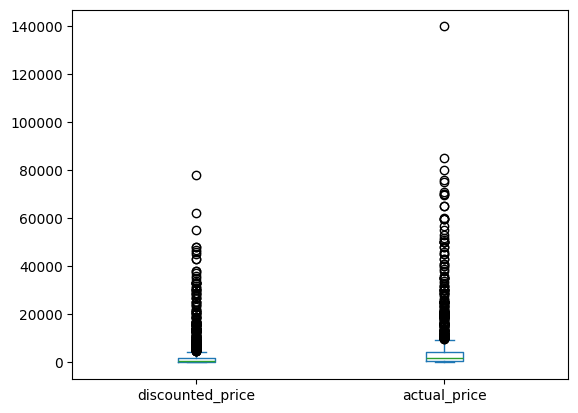

In [56]:
amazon_data['discounted_price'] = amazon_data['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
amazon_data['actual_price'] = amazon_data['actual_price'].str.replace('₹','').str.replace(',','').astype(float)
amazon_data[['discounted_price', 'actual_price']].plot(kind='box'); plt.show()


4.  How does the average discount percentage vary across categories?

In [57]:
amazon_data['discount_percentage'] = amazon_data['discount_percentage'].str.replace('%','').astype(float)
amazon_data.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)


,discount_percentage
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.0
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.0
"Electronics|Headphones,Earbuds&Accessories|Adapters",88.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",87.5
...,...
OfficeProducts|OfficeElectronics|Calculators|Financial&Business,0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper,0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|FountainPens",0.0


5. What are the most popular product names?

In [58]:
amazon_data['product_name'].value_counts().head(10)


,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",3
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3


6. What are the most popular product keyword?

In [59]:
from collections import Counter
from itertools import chain
keywords = chain(*amazon_data['product_name'].str.lower().str.split())
Counter(keywords).most_common(15)


[('with', 751),
 ('for', 672),
 ('|', 457),
 ('&', 432),
 ('usb', 377),
 ('and', 330),
 ('cable', 320),
 ('-', 220),
 ('charging', 219),
 ('to', 218),
 ('fast', 211),
 ('(black)', 187),
 ('c', 182),
 ('smart', 171),
 ('type', 144)]

7. What are the most popular product reviews?

In [60]:
amazon_data['review_title'].str.split(',').explode().value_counts().head(10)


,count
review_title,
Good,691
Good product,443
Value for money,183
Nice,171
Nice product,150
Good quality,99
Good Product,81
Ok,80
Good one,76


8. What is the correlation between discounted_price and rating?

In [61]:
amazon_data['rating'] = amazon_data['rating'].astype(float)
amazon_data[['discounted_price', 'rating']].corr()


,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


9.  What are the Top 5 categories based on the highest ratings?

In [62]:
amazon_data.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


10. ' Identify any potential areas for improvement or optimization based on the data analysis.

In [63]:
amazon_data.isnull().sum()  # Check for missing data
amazon_data.describe(include='all')  # See general stats and anomalies


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,NaN,NaN,NaN,NaN,NaN,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,NaN,NaN,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,NaN,NaN,NaN,NaN,NaN,6,10,10,10,10,8,3,1
mean,NaN,NaN,NaN,3125.310874,5444.990635,47.691468,4.096585,18295.541353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6944.304394,10874.826864,21.635905,0.291674,42753.864952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,39.000000,0.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,325.000000,800.000000,32.000000,4.000000,1186.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,799.000000,1650.000000,50.000000,4.100000,5179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1999.000000,4295.000000,63.000000,4.300000,17336.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Project Name -  Popular Hip-hop Artists and Tracks
#Project Type - EDA

Project Summary

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners

Problem Statement

The objective of this dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

#Let's Begin !


Dataset Loading

In [71]:
url = 'https://drive.google.com/file/d/1bP063FMABh2hKMOhSckAjHSL8NmKvhbT/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
artist_data = pd.read_csv(url)


Dataset First View

In [65]:
artist_data.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


Dataset Rows & Columns count

In [72]:
artist_data.info

<bound method DataFrame.info of              Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]>

Duplicate Values

In [73]:
len(artist_data[artist_data.duplicated()])


27

Missing Values/Null Values


In [74]:
artist_data.isnull().sum()


,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


#Questions :

1.  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [76]:
artist_data.dropna().drop_duplicates()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

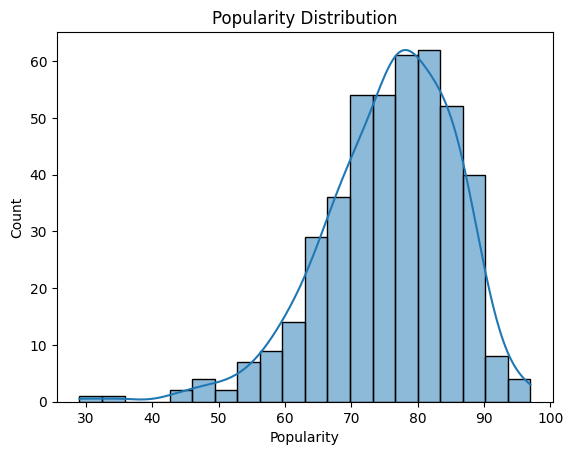

In [78]:
sns.histplot(data=artist_data, x='Popularity', bins=20, kde=True); plt.title('Popularity Distribution'); plt.show()


3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

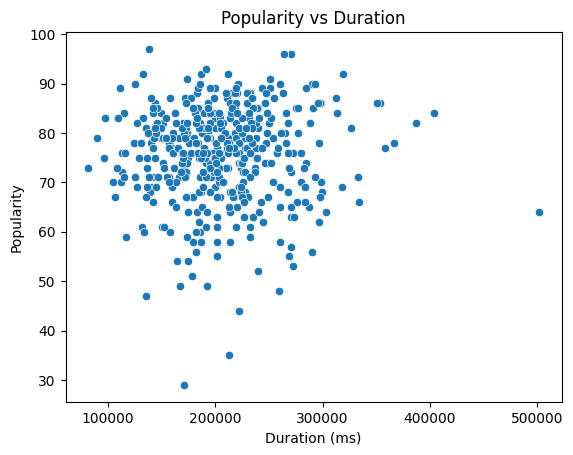

In [79]:
sns.scatterplot(data=artist_data, x='Duration (ms)', y='Popularity'); plt.title('Popularity vs Duration'); plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?

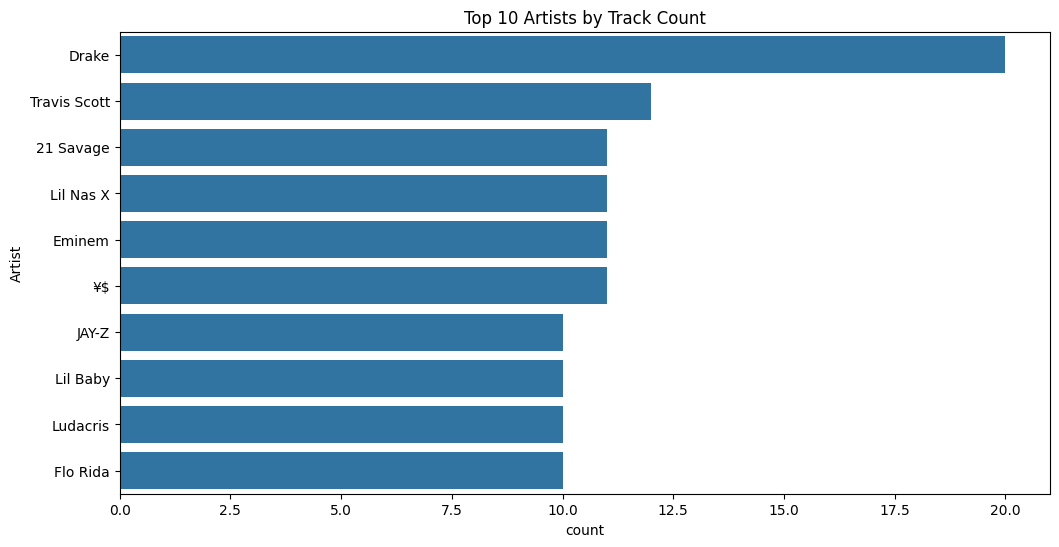

In [85]:
plt.figure(figsize=(12,6));
sns.countplot(data=artist_data, y='Artist', order=artist_data['Artist'].value_counts().head(10).index)
plt.title('Top 10 Artists by Track Count');
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [81]:
artist_data.sort_values('Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
435,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


6.  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [86]:
top_artists = artist_data.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
top_artists


,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,87.000000
¥$,86.090909


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [87]:
top_artist_names = top_artists.index
artist_data[artist_data['Artist'].isin(top_artist_names)].sort_values(['Artist', 'Popularity'], ascending=[True, False]).drop_duplicates('Artist')[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
200,David Guetta,Baby Don't Hurt Me,87
30,Travis Scott,FE!N (feat. Playboi Carti),93
241,Trueno,Mamichula - con Nicki Nicole,89
140,cassö,Prada,92
260,¥$,CARNIVAL,96


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

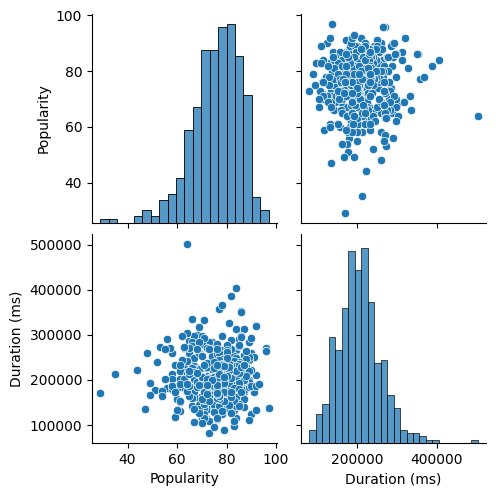

In [88]:
sns.pairplot(artist_data[['Popularity', 'Duration (ms)']]); plt.show()


9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

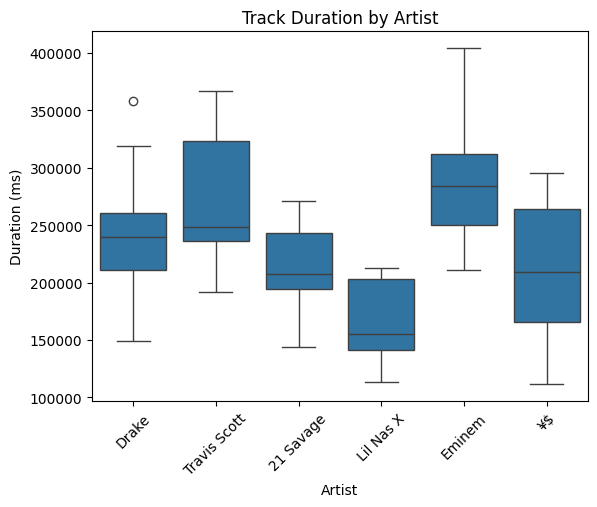

In [89]:
top_artists_plot = artist_data['Artist'].value_counts().head(6).index
sns.boxplot(data=artist_data[artist_data['Artist'].isin(top_artists_plot)], x='Artist', y='Duration (ms)'); plt.xticks(rotation=45); plt.title('Track Duration by Artist'); plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

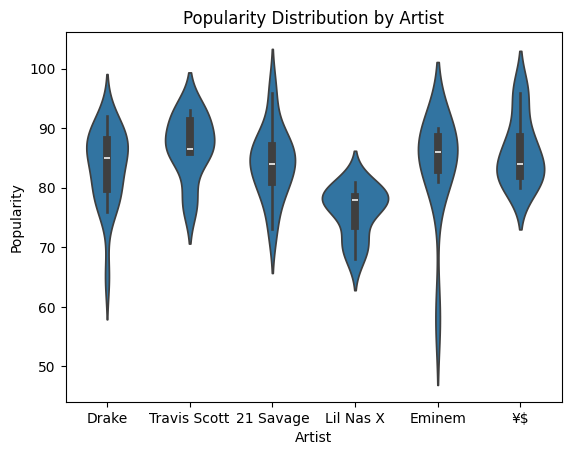

In [90]:
sns.violinplot(data=artist_data[artist_data['Artist'].isin(top_artists_plot)], x='Artist', y='Popularity'); plt.title('Popularity Distribution by Artist'); plt.show()
